# Lab 4

Author: Ryan Rosiak [rrosiak1@gulls.salisbury.edu]

Date: 10/15/20

Description: Continuing to work with the adult data set mixed with probability

In [3]:
import pandas as pd # Pandas library
import numpy as np # Numpy library
import matplotlib.pyplot as plt # Matplotlib library for plotting

In [4]:
# Parse the file
adult_data = pd.read_csv('./adult.data',
                      header=None,
                      skipinitialspace=True,
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ]
                     )
adult_data.head() # Printing the first couple sets of data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Part b
# i.
ed_col = adult_data[['education-num']]
# the 25th, 50th, and 75th percentile of education-num is shown below
ed_col.describe()

,education-num
count,32561.000000
mean,10.080679
std,2.572720
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


In [6]:
# ii.
# What is the probability that an adult makes more than $50K given that there education nums are given by the above quartiles?
# first quartile? ** REMEMBER # of >50K and in the first quartile / # of first quartile ====> The N cancels!!!! So now we can just divide the count by the count
prob_data = adult_data[['education-num', 'income']]
print("P(>50K | first quartile of education-num) = ")
print(prob_data[(prob_data['income'] == '>50K') & (prob_data['education-num'] >= 1) & (prob_data['education-num'] <= 9)].groupby(by='education-num').count().sum() \
                                                     / prob_data[(prob_data['education-num'] >= 1) & (prob_data['education-num'] <= 9)].count().sum())
# second quartile?
print("P(>50K | second quartile of education-num) = ")
print(prob_data[(prob_data['income'] == '>50K') & (prob_data['education-num'] >= 9) & (prob_data['education-num'] <= 10)].groupby(by='education-num').count().sum() \
                                                     / prob_data[(prob_data['education-num'] >= 9) & (prob_data['education-num'] <= 10)].count().sum())
# third quartile?
print("P(>50K | third quartile of education-num) = ")
print(prob_data[(prob_data['income'] == '>50K') & (prob_data['education-num'] >= 10) & (prob_data['education-num'] <= 12)].groupby(by='education-num').count().sum() \
                                                     / prob_data[(prob_data['education-num'] >= 10) & (prob_data['education-num'] <= 12)].count().sum())

P(>50K | first quartile of education-num) = 
income    0.065033
dtype: float64
P(>50K | second quartile of education-num) = 
income    0.08605
dtype: float64
P(>50K | third quartile of education-num) = 
income    0.103337
dtype: float64


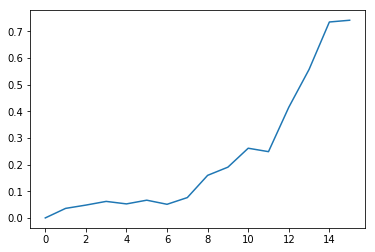

In [81]:
# iii.
# Plot the change in probability that a person makes more and less than $50K given their years of education
plot_prob_data = adult_data[['education-num', 'income']]
greater_data = plot_prob_data[plot_prob_data['income'] == '>50K']
plot_intersection = greater_data.groupby(by='education-num').count()
ed_data = plot_prob_data.groupby(by='education-num').count()
plot_intersection = plot_intersection.reset_index()
ed_data = ed_data.reset_index()
top = [i[1]['income'] for i in plot_intersection.iterrows()]
bottom = [i[1]['income'] for i in ed_data.iterrows()]
top.insert(0,0)
y_values = [i / j for i,j in zip(top, bottom)]
x_values = [i for i in range(0, 16)]

plt.plot(x_values, y_values)